A biexponential function is defined as $f(t) = A(e^{-t/\kappa} - e^{-t/\rho})$, where $0 < \rho < \kappa$.


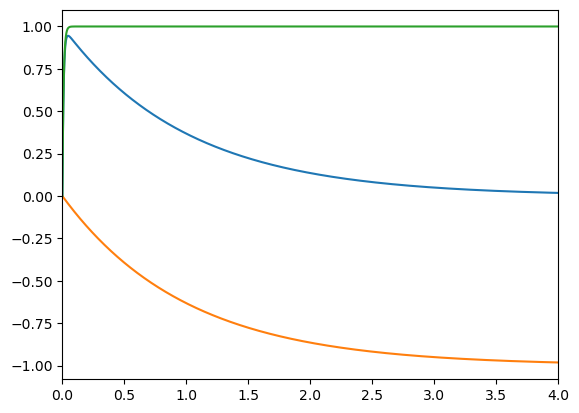

In [42]:
import matplotlib.pyplot as plt
import numpy as np

def fk(t,A,k):
    return A*(np.exp(-t/k) - 1)

def fr(t,A,r):
    return A*(1 - np.exp(-t/r))

def f(t,A,k,r):
    return fk(t,A,k) + fr(t,A,r)

T = np.linspace(0,4,1000)
(A,k,r) = (1,1.00,0.01)
F = [f(t,A,k,r) for t in T]
Fk = [fk(t,A,k) for t in T]
Fr = [fr(t,A,r) for t in T]
plt.xlim((0,4))
plt.plot(T,F)
plt.plot(T,Fk)
plt.plot(T,Fr)

It seems that the $\kappa$ parameter is significantly greater than the $\rho$ parameter. This allows us to approximate
$f(t) \approx A(1 - e^{-t/\rho})$ for small $t$.

Let $\tilde t$ be the $t$ such that $f'(t) = 0$, we propose this approximation between $t = 0$ and $t = \tilde t$.
We show $\tilde t = \frac{\ln\kappa - \ln\rho}{1/\rho - 1/\kappa}$
\begin{align*}
f'(t) &= A(e^{-t/\rho}/\rho - e^{-t/\kappa}/\kappa) \\
0 &= A(e^{-\tilde t/\rho}/\rho - e^{-\tilde t/\kappa}/\kappa) \\
e^{-\tilde t/\kappa}/\kappa &= e^{-\tilde t/\rho}/\rho \\
e^{\tilde t(1/\rho - 1/\kappa)} &= \kappa/\rho \\
\tilde t &= \frac{\ln(\kappa/\rho)}{1/\rho - 1/\kappa} \\
\tilde t &= \frac{\ln\kappa - \ln\rho}{1/\rho - 1/\kappa}
\end{align*}

Now we find $\hat t$, that is the $t$ value at which $f'(t)$ is greatest, this occurs when $f''(t) = 0$.
\begin{align*}
f''(t) &= A(e^{-t/\kappa}/\kappa^2 - e^{-t/\rho}/\rho^2) \\
0 &= A(e^{-\hat t/\kappa}/\kappa^2 - e^{-\hat t/\rho}/\rho^2) \\
e^{-\hat t/\kappa}/\kappa^2 &= e^{-\hat t/\rho}/\rho^2 \\
e^{\hat t(1/\rho - 1/\kappa)} &= \kappa^2/\rho^2 \\
\hat t(1/\rho - 1/\kappa) &= \ln(\kappa^2/\rho^2) \\
\hat t &= 2\frac{\ln\kappa - \ln\rho}{1/\rho - 1/\kappa} \\
 &= 2 \tilde t
\end{align*}
This does not work, instead of giving us the steepest value of $f(t)$ we have the inflection point. We conclude that the steepest part of the rise is at $t = 0$.
This is only by virtue of the fact that our domain starts at $t = 0$. As it happens $f''(t) \to -\infty$ as $t \to -\infty$.

Suppose we determine the gradient at $t = 0$. Then $f'(0) \approx Ae^{0/\rho}/\rho = A/\rho$. This gives us $\rho \approx f'(0)/A$.

Let us sub this into (TODO), then
\begin{align*}
e^{\tilde t(A/f'(0) - 1/\kappa)} &\approx A\kappa/f'(0) \\
e^{\tilde t A/f'(0)}e^{-\tilde t/\kappa} &\approx A\kappa/f'(0) \\
e^{-\tilde t/\kappa}/\kappa &\approx A/f'(0)e^{-\tilde t A/f'(0)} \\
e^{-\tilde t/\kappa}(-\tilde t/\kappa) &\approx -A\tilde te^{-\tilde t A/f'(0)}/f'(0) \\
-\tilde t/\kappa &\approx W(-A\tilde te^{-\tilde t A/f'(0)}/f'(0)) \\
\kappa &\approx -\frac{\tilde t}{W(e^{-\tilde t A/f'(0)}(-A\tilde t/f'(0)))} \\
&= \frac{\tilde t}{A\tilde t/f'(0)} \\
&= \frac{f'(0)}{A} \approx \rho \\
\end{align*}

This is clearly not a good approximation for $\kappa$ as using it results in pathological behaviour.

We approximate $A$ by $f(\tilde t) \approx A(1 - e^{-\tilde t f'(0)/A})$


We approximate $f'(t)$ at $t = \hat t$ by the derivative of $A(e^{-t/\kappa} - 1)$, namely $-Ae^{-t/\kappa}/\kappa$.
\begin{align*}
f'(\hat t) &\approx -Ae^{-\hat t/\kappa}/\kappa \\
 &= -Ae^{-2\tilde t/\kappa}/\kappa \\
2\tilde t f'(\hat t)/A &\approx e^{-2\tilde t/\kappa}(-2\tilde t/\kappa) \\
W(2\tilde t f'(\hat t)/A) &\approx -2\tilde t/\kappa \\
\kappa &\approx -2\tilde t/W(2\tilde t f'(\hat t)/A) \\
\end{align*}
Where $W$ is the Lambert W function.

Using these approximation we get $f(t) \approx A(e^{-tA/f'(0)} - e^{-t(-2\tilde tW(2\tilde t f'(\hat t)/A))})$.

Let us change the approach.

Let $B = 1/\rho - 1/\kappa$ and $C = \ln\kappa - \ln\rho$.

So $\tilde t = BC$, $f'(0) = AB$, and $f(\tilde t) = A(e^{-\tilde t/\kappa} - e^{-\tilde t/\rho})$.

$\rho = 1/(B - 1/\kappa)$, $\kappa = 1/(1/\rho - B)$

$\rho = \kappa e^{-C}$, $\kappa = \rho e^{C}$

$\rho = (1 + e^{-C})/B$

$\kappa = (e^{C} - 1)/B$
\begin{align*}
f(\tilde t)
 &= A(e^{-\tilde t B/(e^{C} - 1)} - e^{-\tilde t B/(1 + e^{-C})}) \\
 &= \frac{f'(0)}{B}(e^{-\tilde t B/(e^{C} - 1)} - e^{-\tilde t B/(1 + e^{-C})}) \\
 &= \frac{f'(0)}{B}(e^{-\tilde t B/(e^{\tilde t/B} - 1)} - e^{-\tilde t B/(1 + e^{-\tilde t/B})})
\end{align*}

(-0.7940236323446893+0.7701117505103791j)
(-0.8198851334773425+0.721997378799347j)
(-0.8447506217944952+0.6719696305662999j)
(-0.8686925521545059+0.6194614993101906j)
(-0.891775803444216+0.5636772161866958j)
(-0.9140586957562369+0.5034241632196604j)
(-0.9355938427183625+0.43674695026702365j)
(-0.9564288699897405+0.3599722153899257j)
(-0.9766070243431848+0.264294279135148j)
(-0.9961676927124448+0.1071826188083496j)
(-0.8016557823379009+0j)
(-0.7151259578932622+0j)
(-0.6564338917979583+0j)
(-0.6110840619811148+0j)
(-0.5739384191977451+0j)
(-0.5424599463148473+0j)
(-0.5151746395537254+0j)
(-0.49113679767928015+0j)
(-0.46969742400769426+0j)
(-0.45038886156742114+0j)
(-0.43286140383272886+0j)
(-0.4168458236561483+0j)
(-0.40212993024520266+0j)
(-0.38854322142622355+0j)
(-0.3759464551642756+0j)
(-0.36422434034694723+0j)
(-0.3532802773834613+0j)
(-0.3430324874247889+0j)
(-0.333411107271693+0j)
(-0.32435597136087374+0j)
(-0.31581489251053985+0j)
(-0.30774231121636636+0j)
(-0.3000982216348643+0j

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1390: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


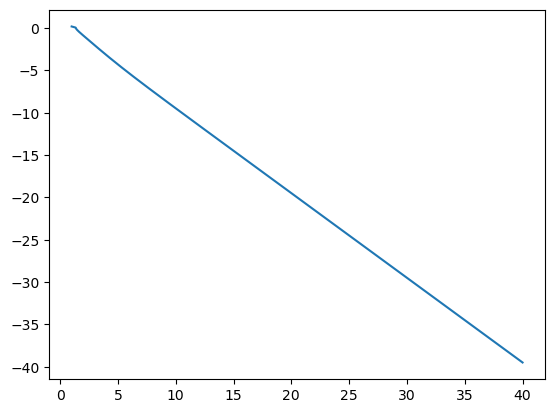

In [49]:

import matplotlib.pyplot as plt
import numpy as np
import scipy.special as sp

def f(t,A, ttilde, fprime0, fprimehat):
    print(sp.lambertw(2*ttilde*fprimehat/A))
    return A*(np.exp(-t*A/fprime0) - np.exp(-t*(-2*ttilde*sp.lambertw(2*ttilde*fprimehat/A))))

AA = np.linspace(1,40,1000)
(t, ttilde, fprime0, fprimehat) = (1,0.5,1.5,-0.5)
F = [f(t, A, ttilde, fprime0, fprimehat) for A in AA]
plt.plot(AA,F)